# ML100Days_Midterm

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

## Import Data

In [2]:
data_root = './ml100_midterm/'

data_train = pd.read_csv(data_root + 'train_data.csv')
data_test = pd.read_csv(data_root + 'test_features.csv')

train_shape = data_train.shape
test_shape = data_test.shape
print(f"The size of training data is {train_shape}")
print(f"The size of testing data is {test_shape}")
data_train.head()

The size of training data is (113, 22)
The size of testing data is (33, 21)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


## Preprocess

In [3]:
train_Y = data_train['poi'].map({False: 0, True: 1})
name_test = data_test['name']

df_train = data_train.drop(['name', 'poi'], axis=1)
df_test = data_test.drop(['name'], axis=1)

df = pd.concat([df_train, df_test])
numeric_feature = 0
non_numeric_feature = 0
for dtype in df.dtypes:
    if dtype == 'float64' or dtype == 'int64':
        numeric_feature += 1
    else:
        non_numeric_feature += 1
print(f'Numeric Features: {numeric_feature}')
print(f'Others: {non_numeric_feature}')

Numeric Features: 19
Others: 1


In [4]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head())
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356


In [5]:
df["email_address"] = df["email_address"].notna().map({False: 0, True: 1})

Column: bonus


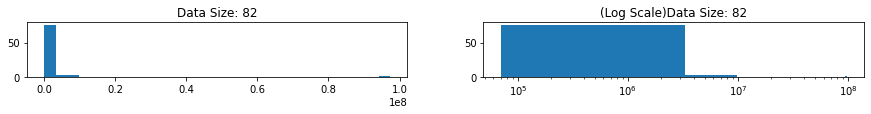

Column: deferral_payments


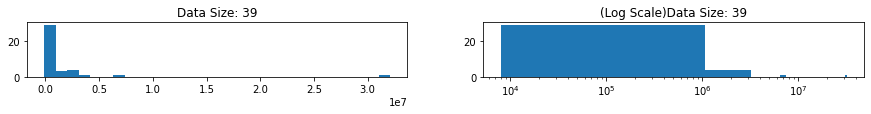

Column: deferred_income


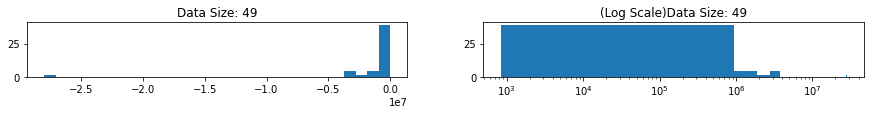

Column: director_fees


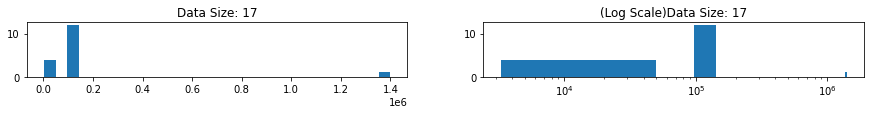

Column: email_address


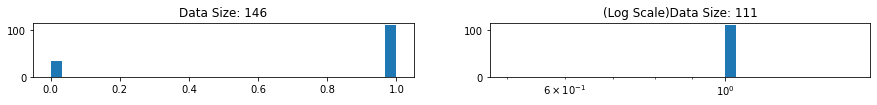

Column: exercised_stock_options


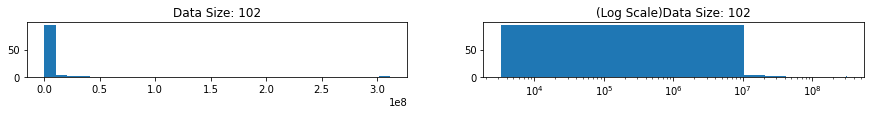

Column: expenses


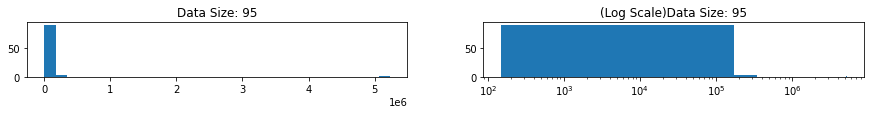

Column: from_messages


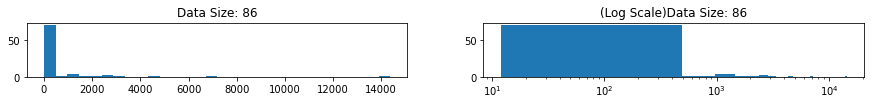

Column: from_poi_to_this_person


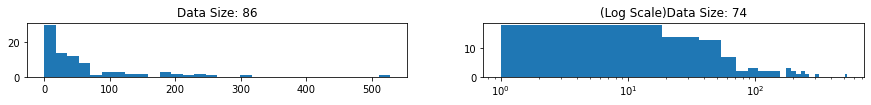

Column: from_this_person_to_poi


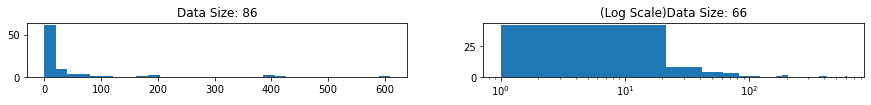

Column: loan_advances


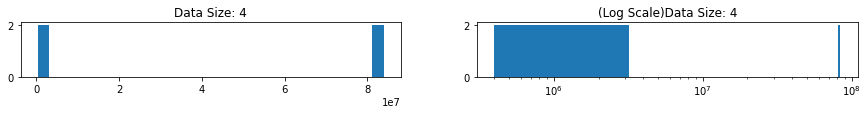

Column: long_term_incentive


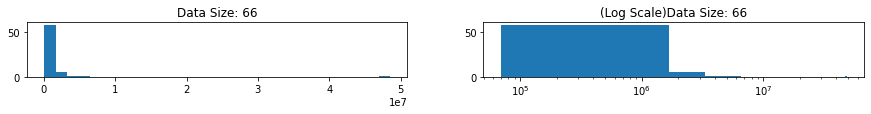

Column: other


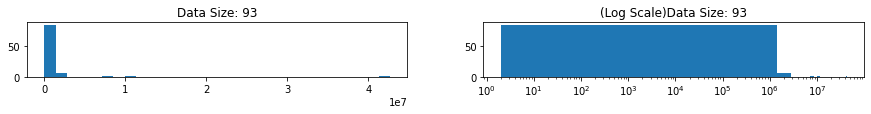

Column: restricted_stock


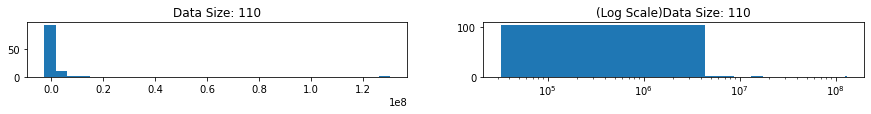

Column: restricted_stock_deferred


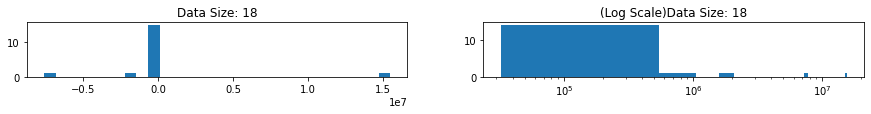

Column: salary


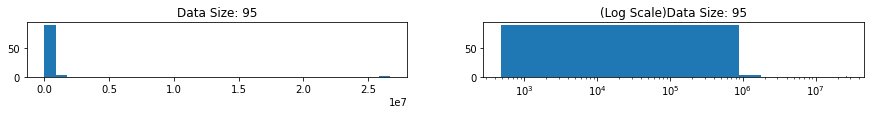

Column: shared_receipt_with_poi


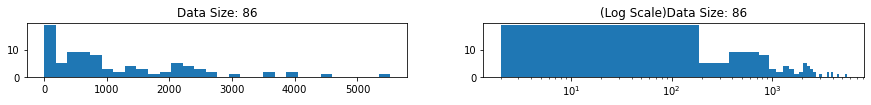

Column: to_messages


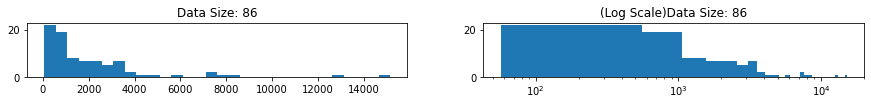

Column: total_payments


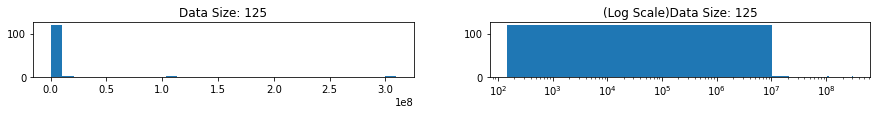

Column: total_stock_value


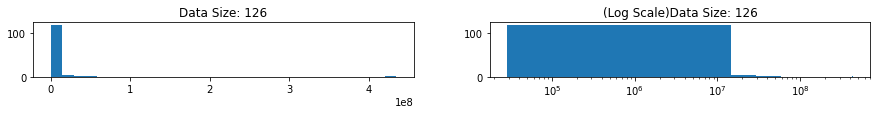

In [6]:
for col in df.columns:
    print(f"Column: {col}")
    datas1 = df[col][df[col].notnull()]
    datas2 = abs(datas1)
    datas2 = datas2[datas2 != 0]
    
    fig, ax = plt.subplots(1 ,2, figsize=(15, 1))
    hist1 = ax[0].hist(datas1, bins=30)
    hist2 = ax[1].hist(datas2, bins=30)
    ax[0].set_title(f"Data Size: {len(datas1)}")
    ax[1].set_title(f"(Log Scale)Data Size: {len(datas2)}")
    ax[1].set_xscale('log')
    plt.show()

In [7]:
# fillna
df["from_poi_to_this_person"] = df["from_poi_to_this_person"].fillna(df['from_poi_to_this_person'].median())
df["from_this_person_to_poi"] = df["from_this_person_to_poi"].fillna(df['from_this_person_to_poi'].median())
df = df.fillna(0)
for col in df.columns:
    if col != "email_address":
        df[col] = df[col].map(lambda i: np.log(abs(i)) if i != 0 else 0)

In [8]:
na_check(df)
df.head()

,Missing Ratio


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,14.375126,0.0,15.069526,0.0,1,16.800898,10.756838,2.890372,3.737670,1.386294,0.0,14.296090,12.071621,14.826516,0.0,12.949523,6.761573,6.807935,13.132413,16.930915
1,15.538277,0.0,0.000000,0.0,1,16.773022,10.286571,4.682131,4.477337,3.401197,0.0,14.467836,10.004328,15.738835,0.0,13.921003,7.621685,8.196161,15.976845,17.077203
2,12.206073,0.0,8.334952,0.0,1,14.300647,10.038193,3.663562,2.564949,2.639057,0.0,0.000000,14.268701,13.675352,0.0,12.263605,4.510860,5.416100,14.510598,14.729244
3,13.592367,0.0,0.000000,0.0,1,0.000000,11.679575,0.000000,3.555348,2.079442,0.0,13.309127,13.718451,13.800429,0.0,12.320762,0.000000,0.000000,14.791055,13.800429
4,14.038654,0.0,12.478006,0.0,1,0.000000,10.486206,4.969813,5.293305,3.218876,0.0,12.835492,6.186209,11.744251,0.0,12.389181,7.690743,7.862497,14.309778,11.744251


In [9]:
# 切分訓練及測試資料集
train_X = df[:train_shape[0]]
test_X = df[train_shape[0]:]

## Prediction

In [10]:
# 使用邏輯斯迴歸作預測
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0, solver='lbfgs', max_iter=1000)

In [11]:
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name_test, 'poi': lr_pred})
sub.to_csv('Prediction_lr.csv', index=False)